In [1]:
%ls
%cd ..

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 067D-FB3E

 C:\Users\Dongmin Kim\Documents\OnlineTSAD\figures 디렉터리

2023-04-30  오후 09:22    <DIR>          .
2023-04-30  오후 09:22    <DIR>          ..
2023-04-28  오후 12:56    <DIR>          .ipynb_checkpoints
2023-04-27  오후 09:27           346,353 evt_logfit.ipynb
2023-04-29  오후 02:18         2,810,531 NTS_UNI_Trend_New_Normal.ipynb
2023-04-30  오후 09:22         2,916,812 onoff_comparison.ipynb
2023-04-12  오후 05:06        22,199,130 SWaT.ipynb
2023-04-22  오후 06:52                72 Untitled.ipynb
2023-04-27  오후 08:27           210,848 Untitled1.ipynb
2023-04-28  오후 12:52           246,453 Untitled2.ipynb
               7개 파일          28,730,199 바이트
               3개 디렉터리  85,346,541,568 바이트 남음
C:\Users\Dongmin Kim\Documents\OnlineTSAD


In [2]:
import numpy as np
import matplotlib as mat
from matplotlib import font_manager, rc

def setPlotStyle():    
    #mat.rcParams['font.family'] = "serif"
    #mat.rcParams['font.serif'] = ["Arial"]
    mat.rcParams['font.family'] = "sans-serif"
    mat.rcParams['font.sans-serif'] = "Times new roman"
    mat.rcParams["axes.titlesize"] = "x-large"
    mat.rcParams['font.size'] = 15
    mat.rcParams['legend.fontsize'] = 15
    mat.rcParams['lines.linewidth'] = 2
    mat.rcParams['lines.color'] = 'r'
    mat.rcParams['axes.grid'] = 1     
    mat.rcParams['axes.xmargin'] = 0.1     
    mat.rcParams['axes.ymargin'] = 0.1     
    mat.rcParams["mathtext.fontset"] = "dejavuserif" #"cm", "stix", etc.
    mat.rcParams['figure.dpi'] = 500
    mat.rcParams['savefig.dpi'] = 500
setPlotStyle()

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [4]:
def subresult(path, keyword):
    print(f"{path} | {keyword}")
    arr = []
    for file in os.listdir(path):
        if keyword in file and file[0] != '_':
            print(file)
            df = pd.read_csv(os.path.join(path, file), index_col=0)
            arr.append(df)
    arr = pd.concat(arr)
    
    index = arr.index
    is_duplicate = index.duplicated(keep="first")
    not_duplicate = ~is_duplicate
    arr = arr[not_duplicate]
    arr = arr.drop("Qbest", errors="ignore")
    arr = arr.rename(dict(zip(arr.index, list(map(lambda x: float(x.replace("Q", "")), list(arr.index))))))
    arr = arr.sort_index()
    return arr.index, arr["F1"].values

In [9]:
def savedf(path, keyword):
    print(f"{path} | {keyword}")
    arr = []
    for file in os.listdir(path):
        if keyword in file and file[0] != '_':
            print(file)
            df = pd.read_csv(os.path.join(path, file), index_col=0)
            arr.append(df)
    arr = pd.concat(arr)
    
    index = arr.index
    is_duplicate = index.duplicated(keep="first")
    not_duplicate = ~is_duplicate
    arr = arr[not_duplicate]
    
    if "Qbest" in index:
        arr_qbest = pd.DataFrame([arr.loc["Qbest"]], columns=arr.columns)
        arr = arr.drop("Qbest", errors="ignore")
    arr = arr.rename(dict(zip(arr.index, list(map(lambda x: float(x.replace("Q", "")), list(arr.index))))))
    arr = arr.sort_index()
    if "Qbest" in index:
        arr = pd.concat([arr, arr_qbest])
        
    arr.to_csv(os.path.join(f"{path}", f"_{keyword}"))

results\MLP_SWaT_normalization_None | offline_0
MLP_SWaT_normalization_None_offline_0.999_1.0_0.0001.csv
MLP_SWaT_normalization_None_offline_0.99_1.0_0.001.csv
MLP_SWaT_normalization_None_offline_0.9_1.0_0.01.csv
results\MLP_SWaT_normalization_None | offline_0
MLP_SWaT_normalization_None_offline_0.999_1.0_0.0001.csv
MLP_SWaT_normalization_None_offline_0.99_1.0_0.001.csv
MLP_SWaT_normalization_None_offline_0.9_1.0_0.01.csv
results\MLP_SWaT_normalization_SlowRevIN | SlowRevIN_online_0
MLP_SWaT_normalization_SlowRevIN_online_0.995_0.997_0.0001.csv
MLP_SWaT_normalization_SlowRevIN_online_0.999_1.0_0.0001.csv
MLP_SWaT_normalization_SlowRevIN_online_0.99_1.0_0.001.csv
MLP_SWaT_normalization_SlowRevIN_online_0.9_1.0_0.01.csv
results\MLP_SWaT_normalization_SlowRevIN | SlowRevIN_online_0
MLP_SWaT_normalization_SlowRevIN_online_0.995_0.997_0.0001.csv
MLP_SWaT_normalization_SlowRevIN_online_0.999_1.0_0.0001.csv
MLP_SWaT_normalization_SlowRevIN_online_0.99_1.0_0.001.csv
MLP_SWaT_normalization_Slow

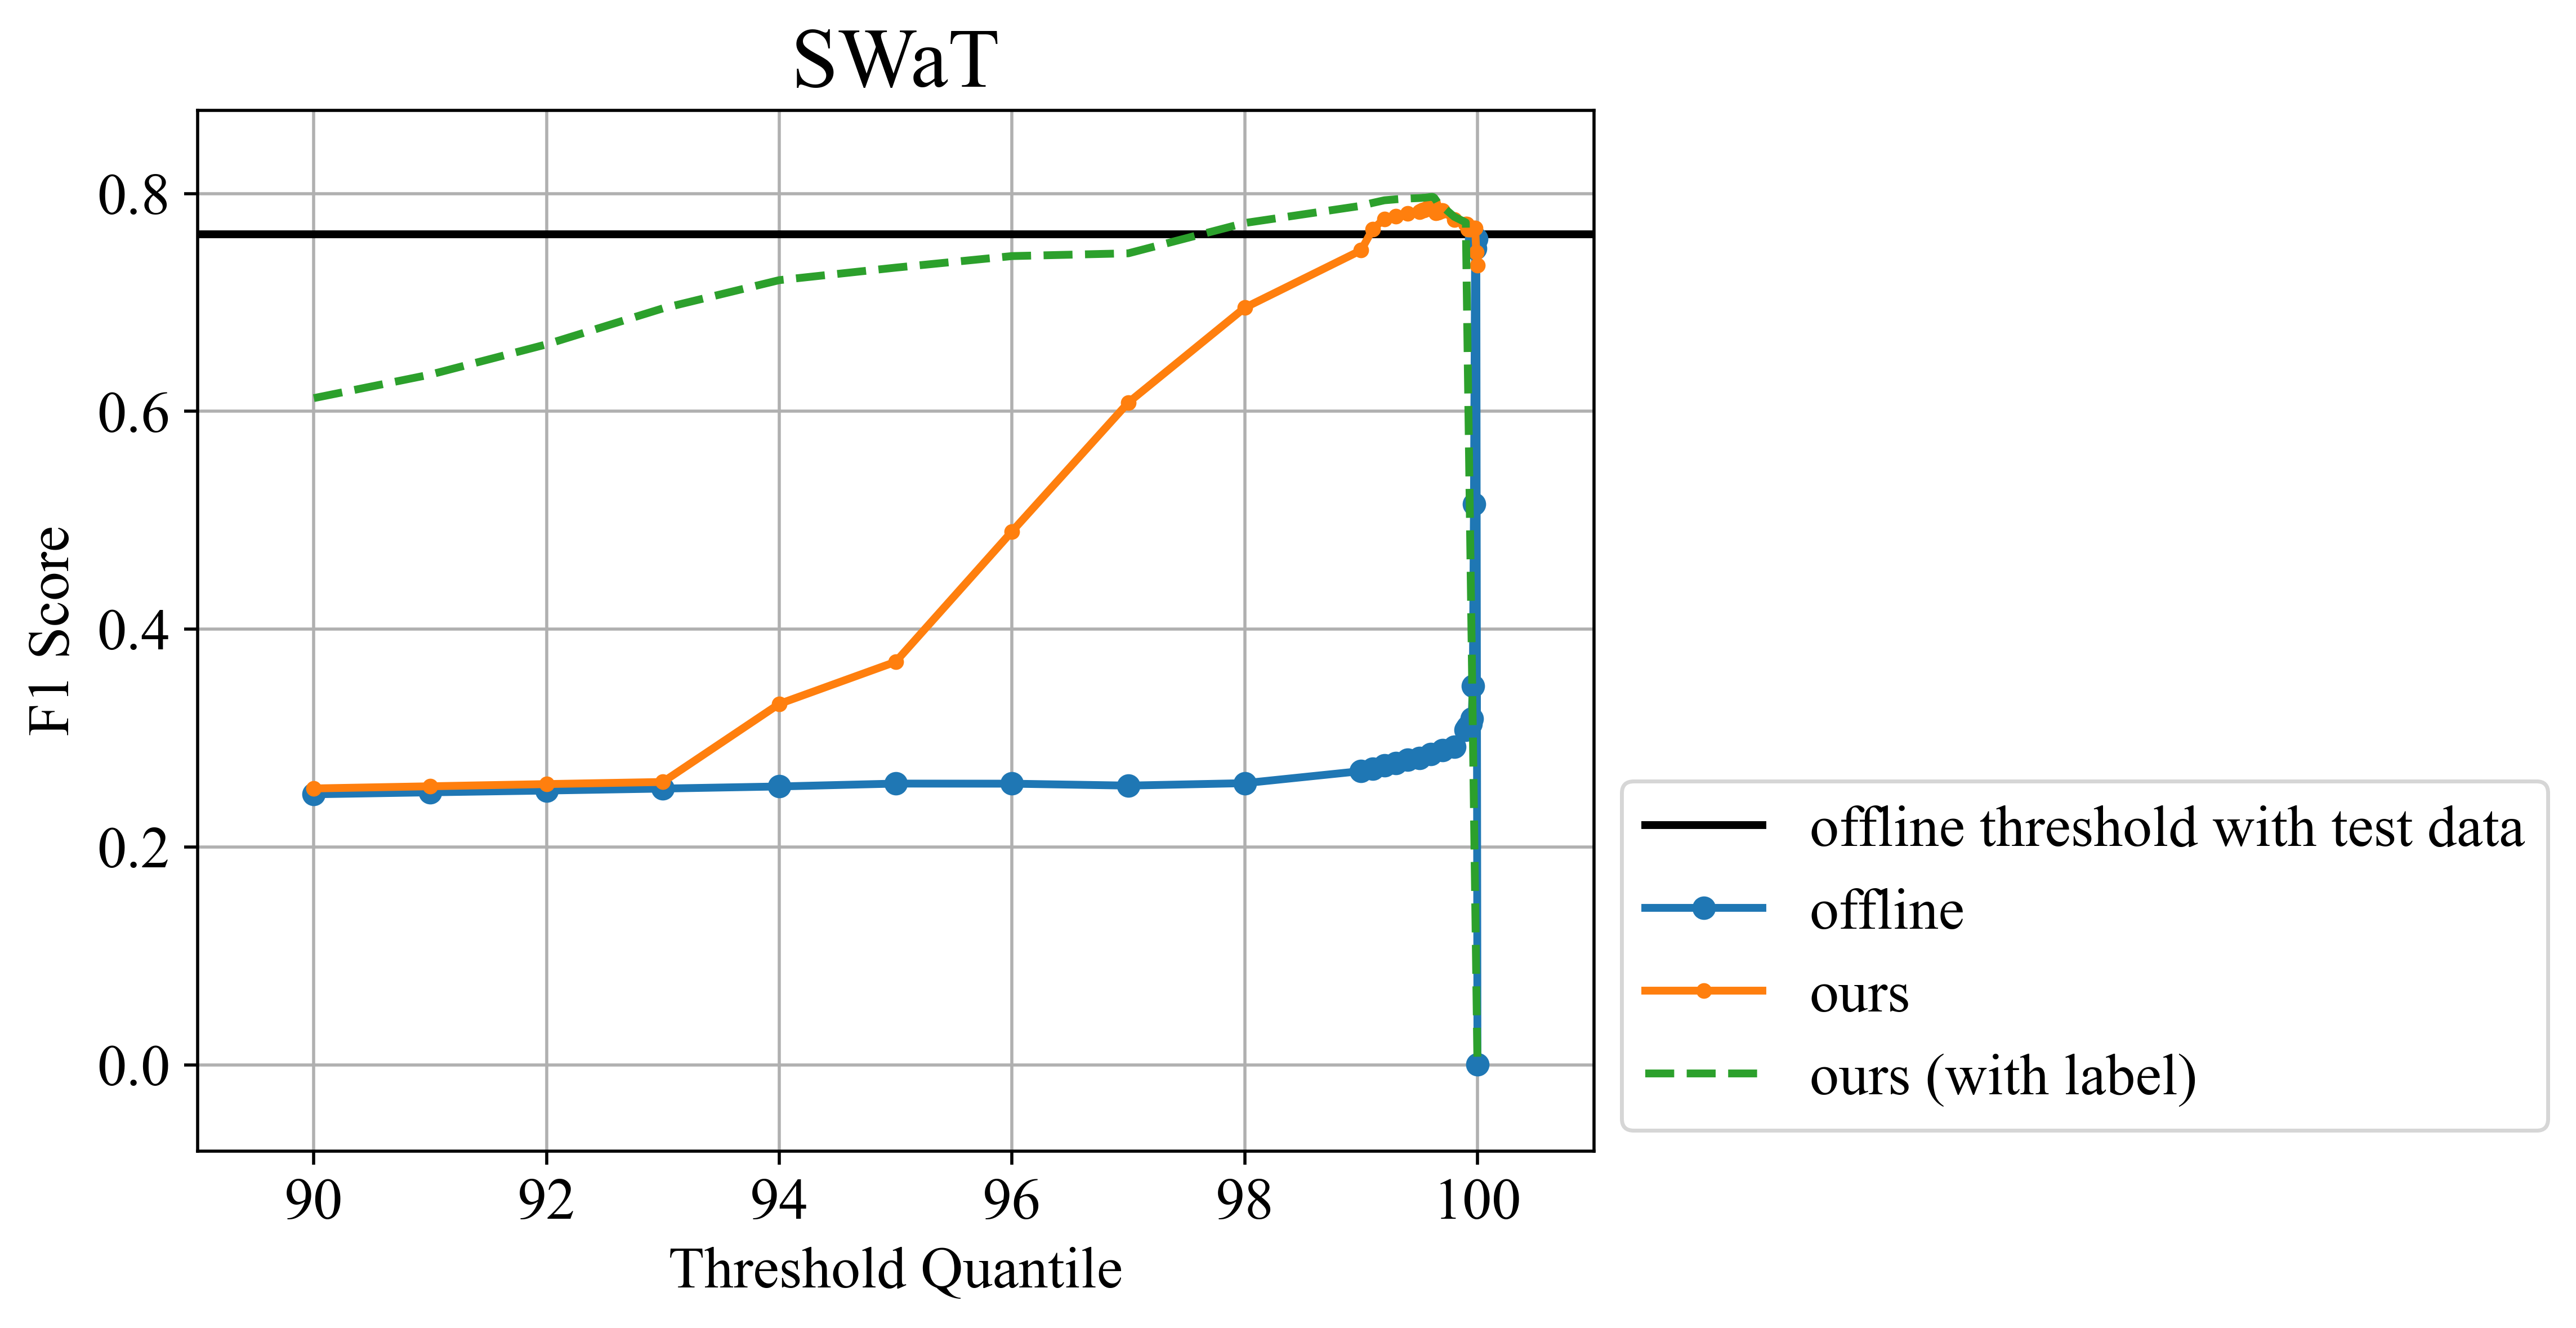

results\MLP_WADI_normalization_None | offline_0
MLP_WADI_normalization_None_offline_0.93_1.0_0.001.csv
MLP_WADI_normalization_None_offline_0.9_1.0_0.01.csv
results\MLP_WADI_normalization_None | offline_0
MLP_WADI_normalization_None_offline_0.93_1.0_0.001.csv
MLP_WADI_normalization_None_offline_0.9_1.0_0.01.csv
results\MLP_WADI_normalization_SlowRevIN | SlowRevIN_online_0
MLP_WADI_normalization_SlowRevIN_online_0.93_1.0_0.001.csv
MLP_WADI_normalization_SlowRevIN_online_0.995_0.997_0.0001.csv
MLP_WADI_normalization_SlowRevIN_online_0.9_1.0_0.01.csv
results\MLP_WADI_normalization_SlowRevIN | SlowRevIN_online_0
MLP_WADI_normalization_SlowRevIN_online_0.93_1.0_0.001.csv
MLP_WADI_normalization_SlowRevIN_online_0.995_0.997_0.0001.csv
MLP_WADI_normalization_SlowRevIN_online_0.9_1.0_0.01.csv
results\MLP_WADI_normalization_SlowRevIN | SlowRevIN_online_label
MLP_WADI_normalization_SlowRevIN_online_label_0.93_1.0_0.001.csv
MLP_WADI_normalization_SlowRevIN_online_label_0.9_1.0_0.01.csv
results\MLP_

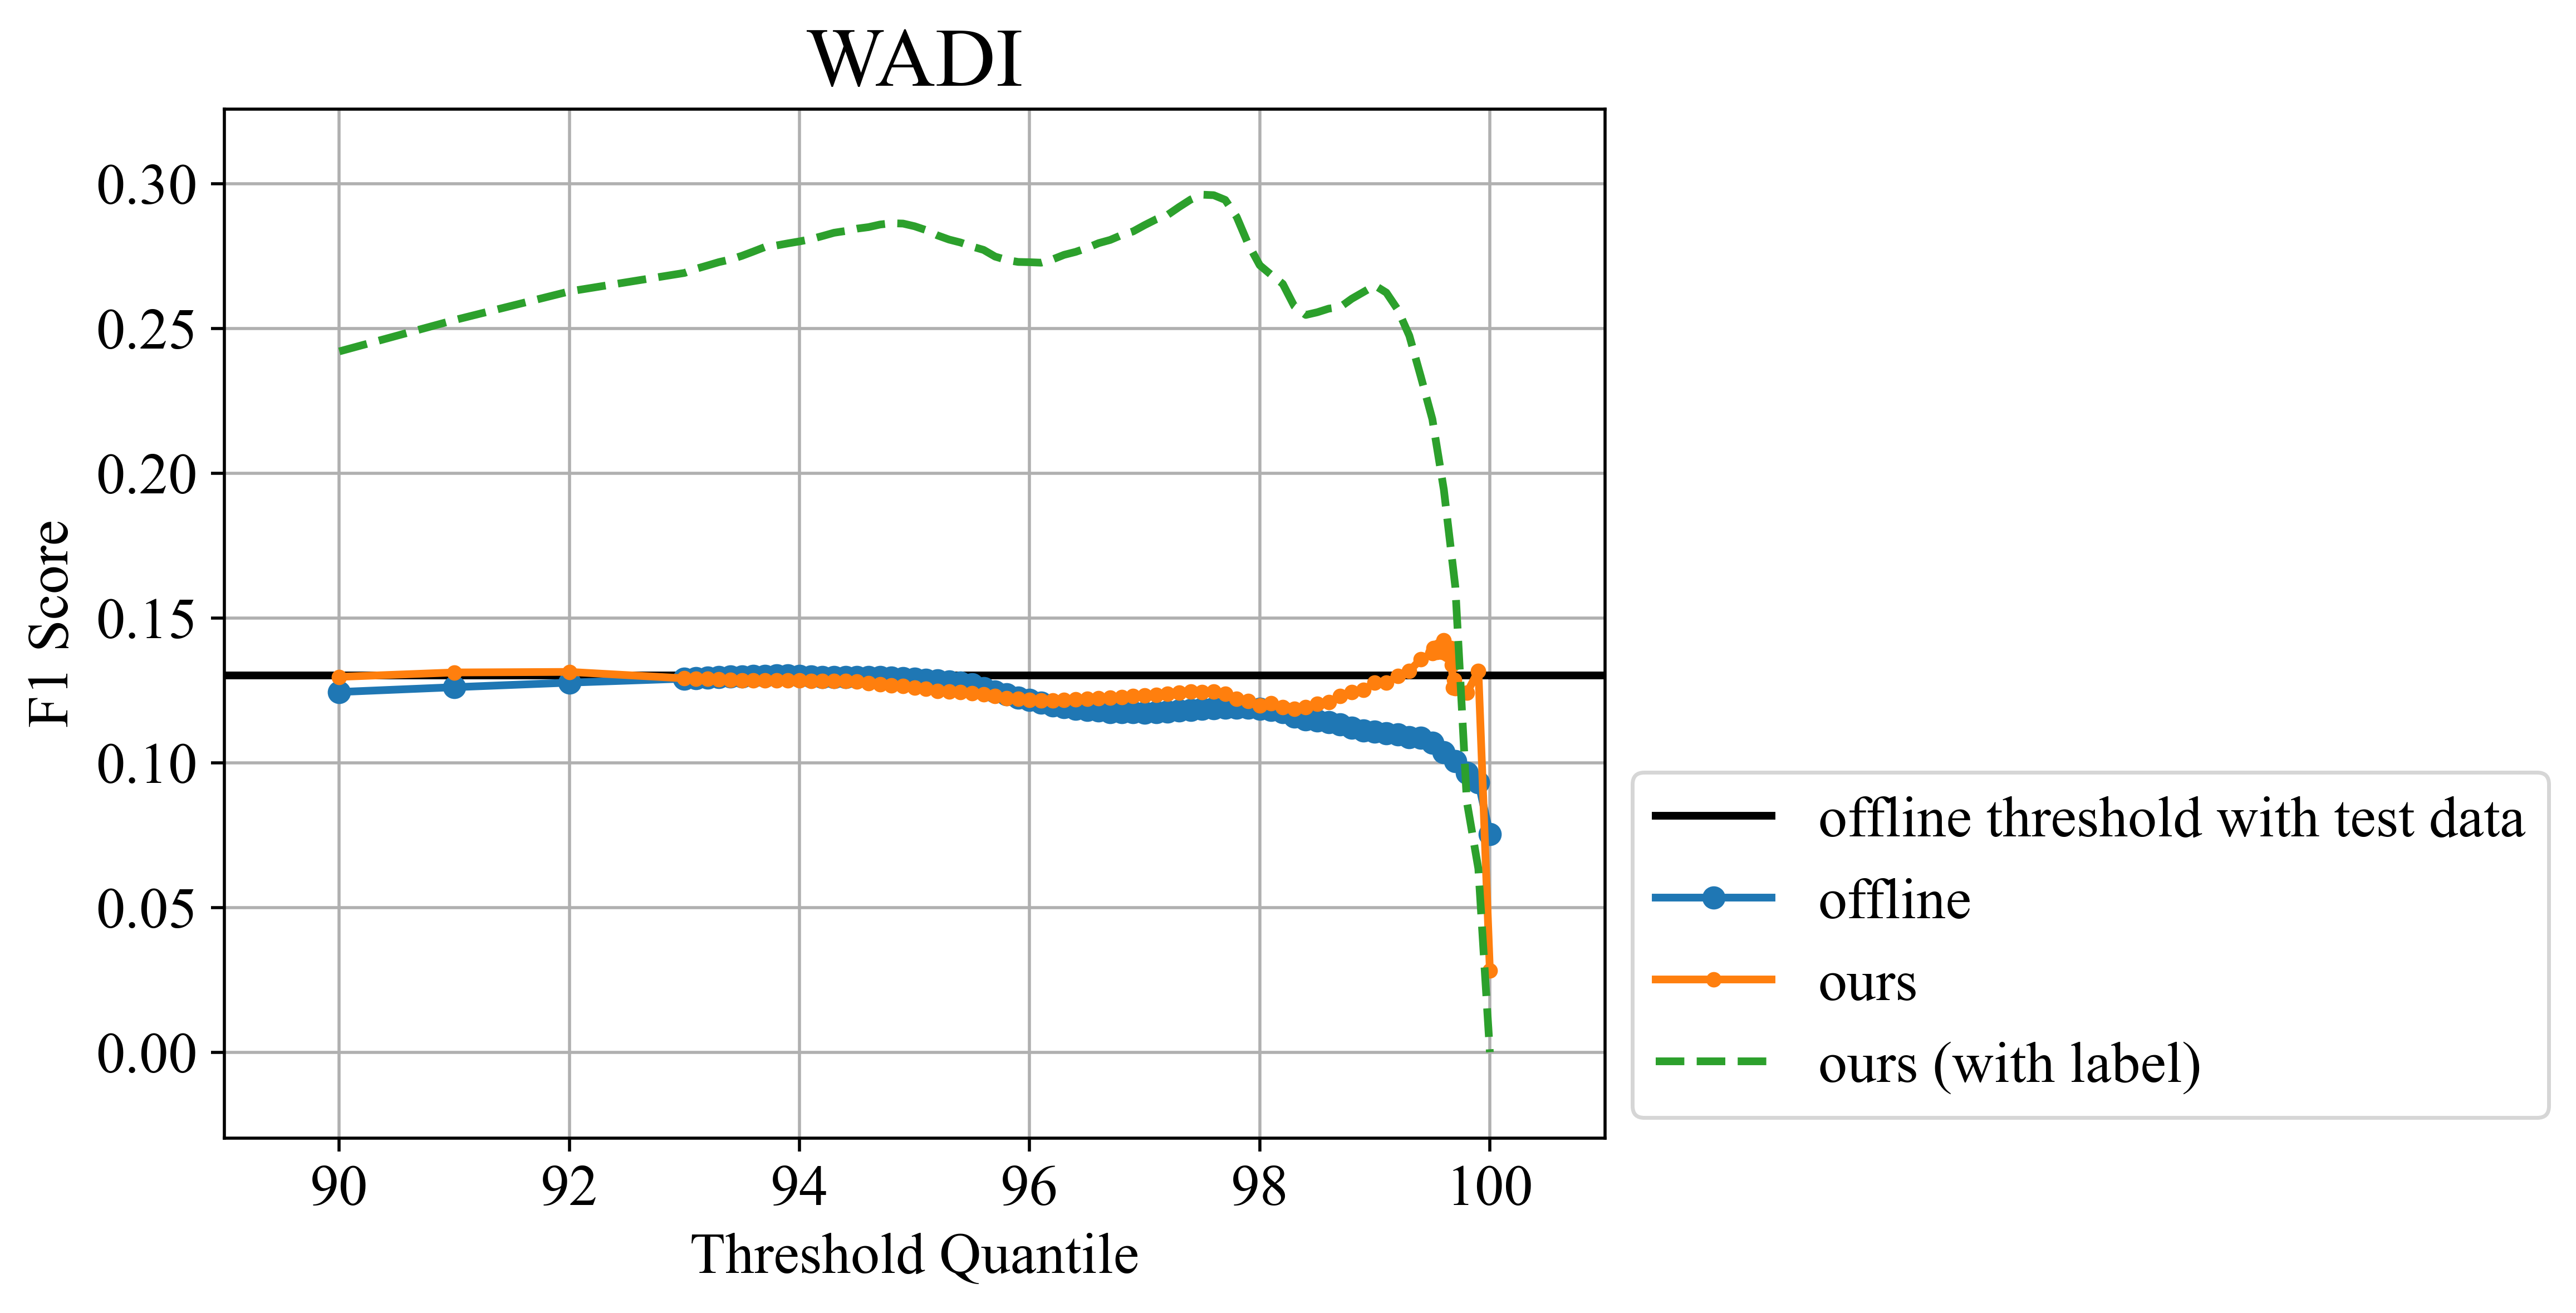

results\MLP_PSM_normalization_None | offline_0
MLP_PSM_normalization_None_offline_0.8_1.0_0.01.csv
results\MLP_PSM_normalization_None | offline_0
MLP_PSM_normalization_None_offline_0.8_1.0_0.01.csv
results\MLP_PSM_normalization_SlowRevIN | SlowRevIN_online_0
MLP_PSM_normalization_SlowRevIN_online_0.8_1.0_0.01.csv
results\MLP_PSM_normalization_SlowRevIN | SlowRevIN_online_0
MLP_PSM_normalization_SlowRevIN_online_0.8_1.0_0.01.csv
results\MLP_PSM_normalization_SlowRevIN | SlowRevIN_online_label
MLP_PSM_normalization_SlowRevIN_online_label_0.8_1.0_0.01.csv
results\MLP_PSM_normalization_SlowRevIN | SlowRevIN_online_label
MLP_PSM_normalization_SlowRevIN_online_label_0.8_1.0_0.01.csv


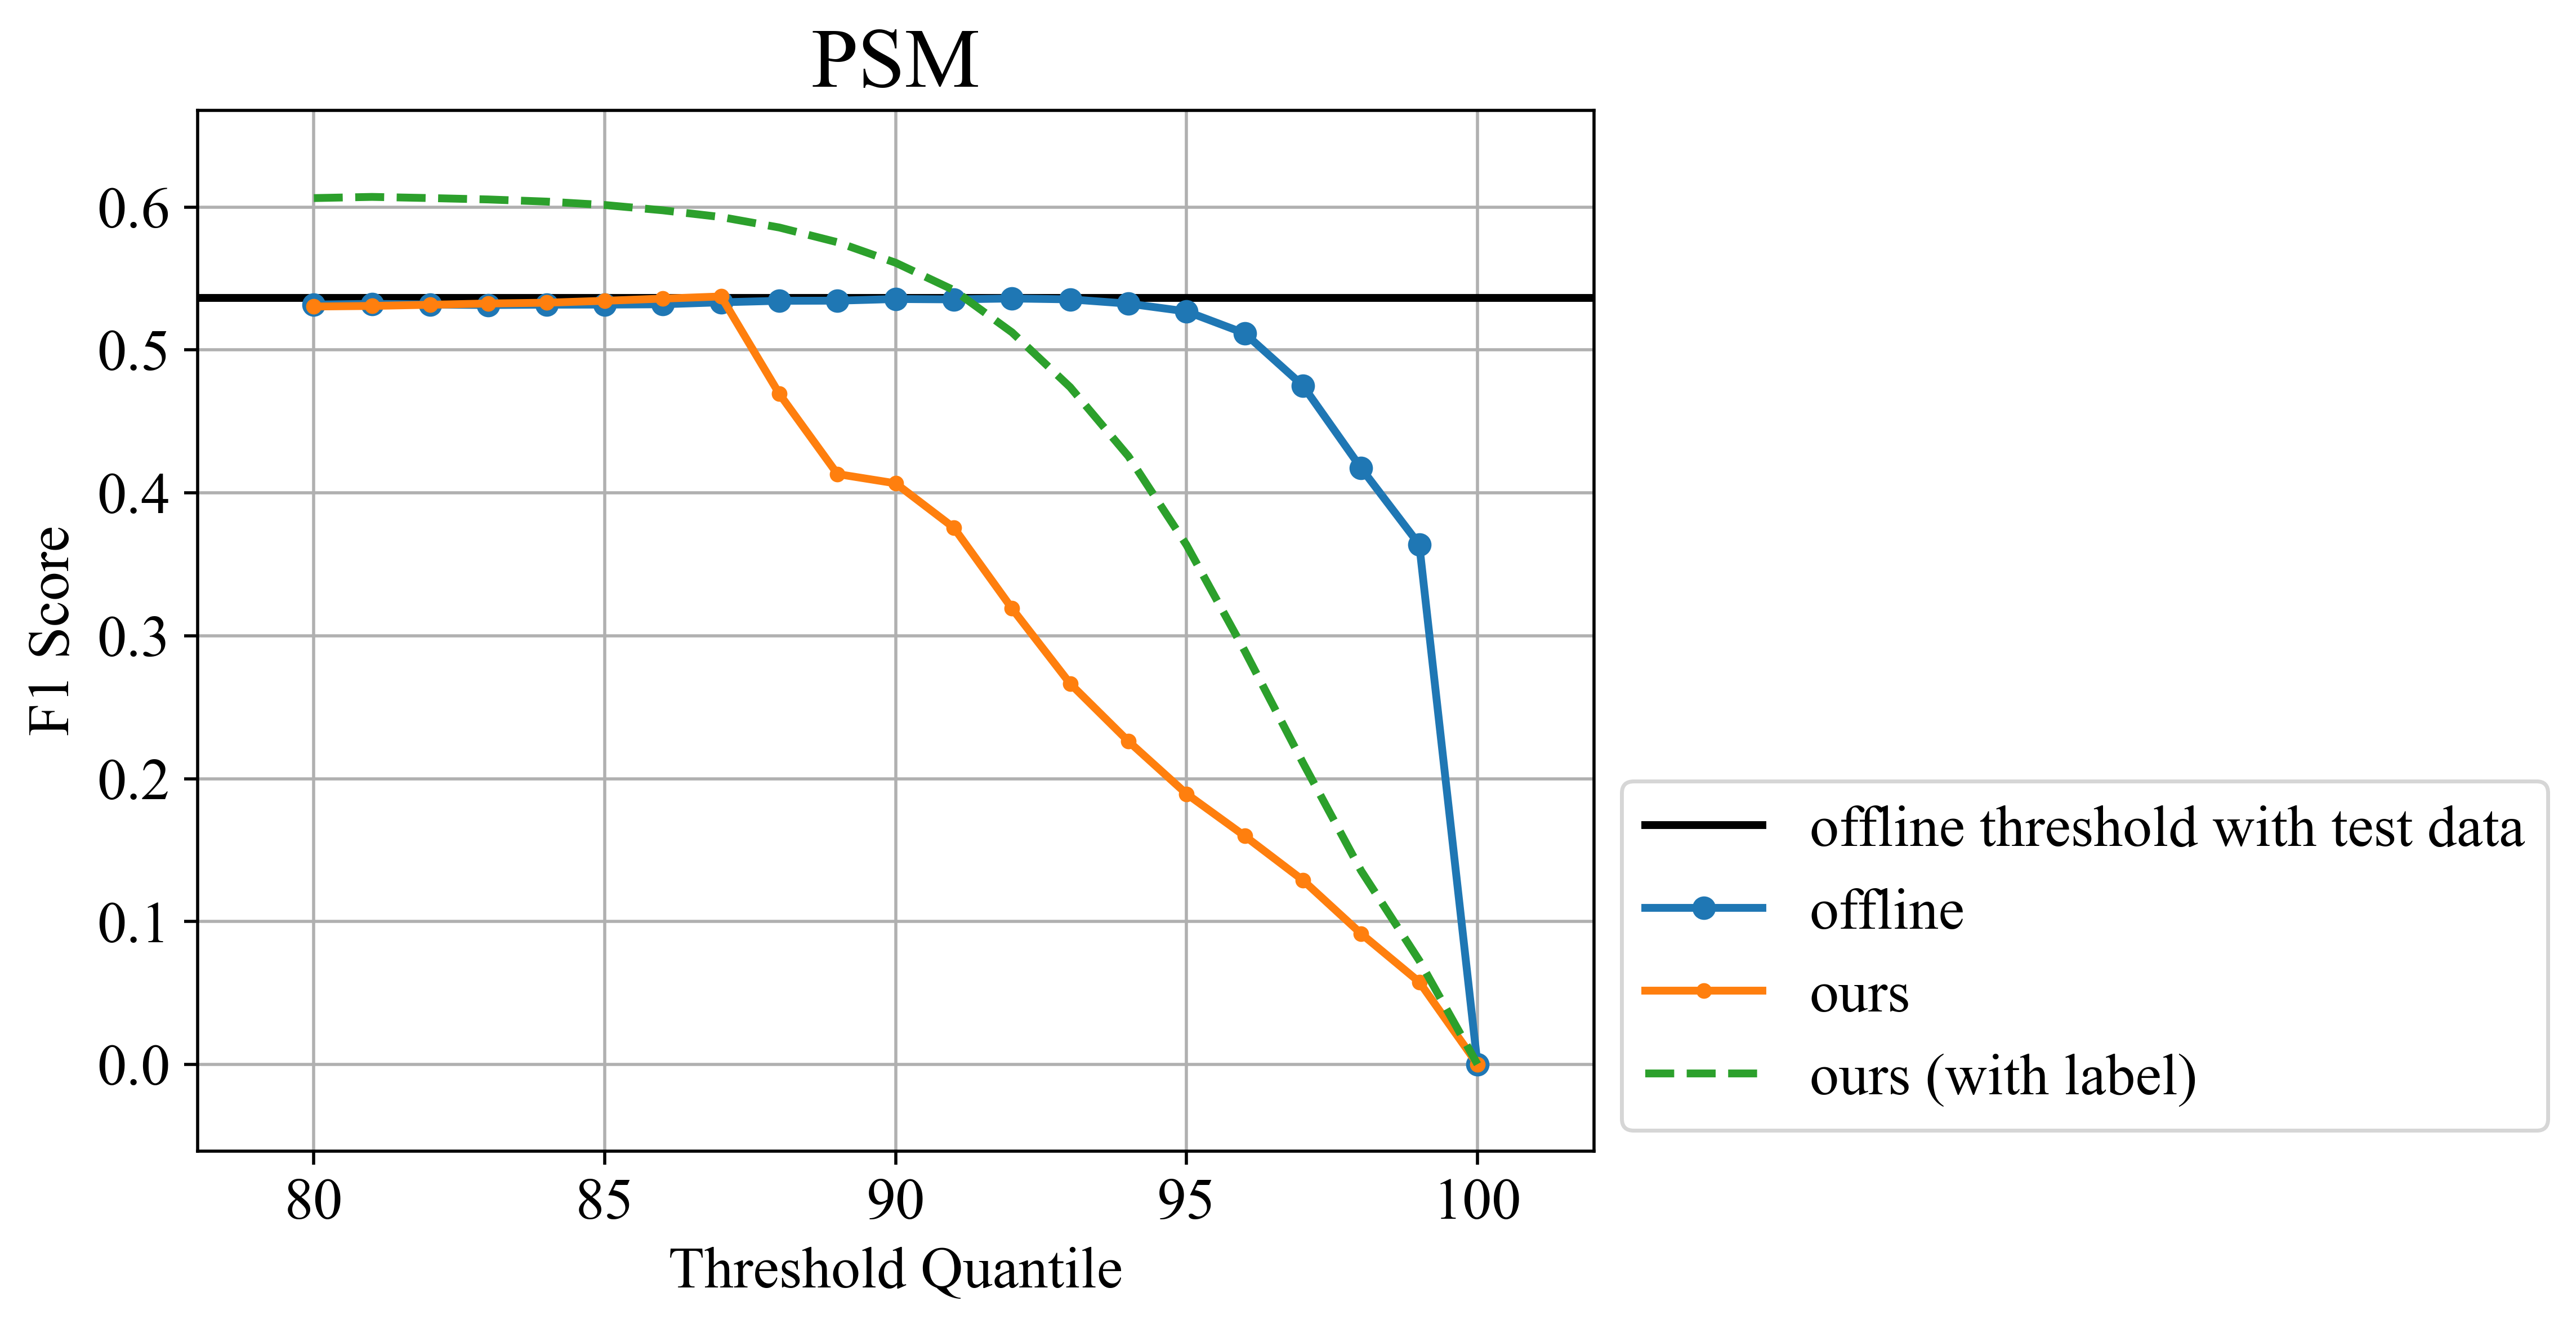

results\MLP_CreditCard_normalization_None | offline_0
MLP_CreditCard_normalization_None_offline_0.999_1.0_0.0001.csv
MLP_CreditCard_normalization_None_offline_0.99_1.0_0.001.csv
MLP_CreditCard_normalization_None_offline_0.9_1.0_0.01.csv
results\MLP_CreditCard_normalization_None | offline_0
MLP_CreditCard_normalization_None_offline_0.999_1.0_0.0001.csv
MLP_CreditCard_normalization_None_offline_0.99_1.0_0.001.csv
MLP_CreditCard_normalization_None_offline_0.9_1.0_0.01.csv
results\MLP_CreditCard_normalization_SlowRevIN | SlowRevIN_online_0
MLP_CreditCard_normalization_SlowRevIN_online_0.99_1.0_0.001.csv
MLP_CreditCard_normalization_SlowRevIN_online_0.9_1.0_0.01.csv
results\MLP_CreditCard_normalization_SlowRevIN | SlowRevIN_online_0
MLP_CreditCard_normalization_SlowRevIN_online_0.99_1.0_0.001.csv
MLP_CreditCard_normalization_SlowRevIN_online_0.9_1.0_0.01.csv
results\MLP_CreditCard_normalization_SlowRevIN | SlowRevIN_online_label
MLP_CreditCard_normalization_SlowRevIN_online_label_0.99_1.0_0

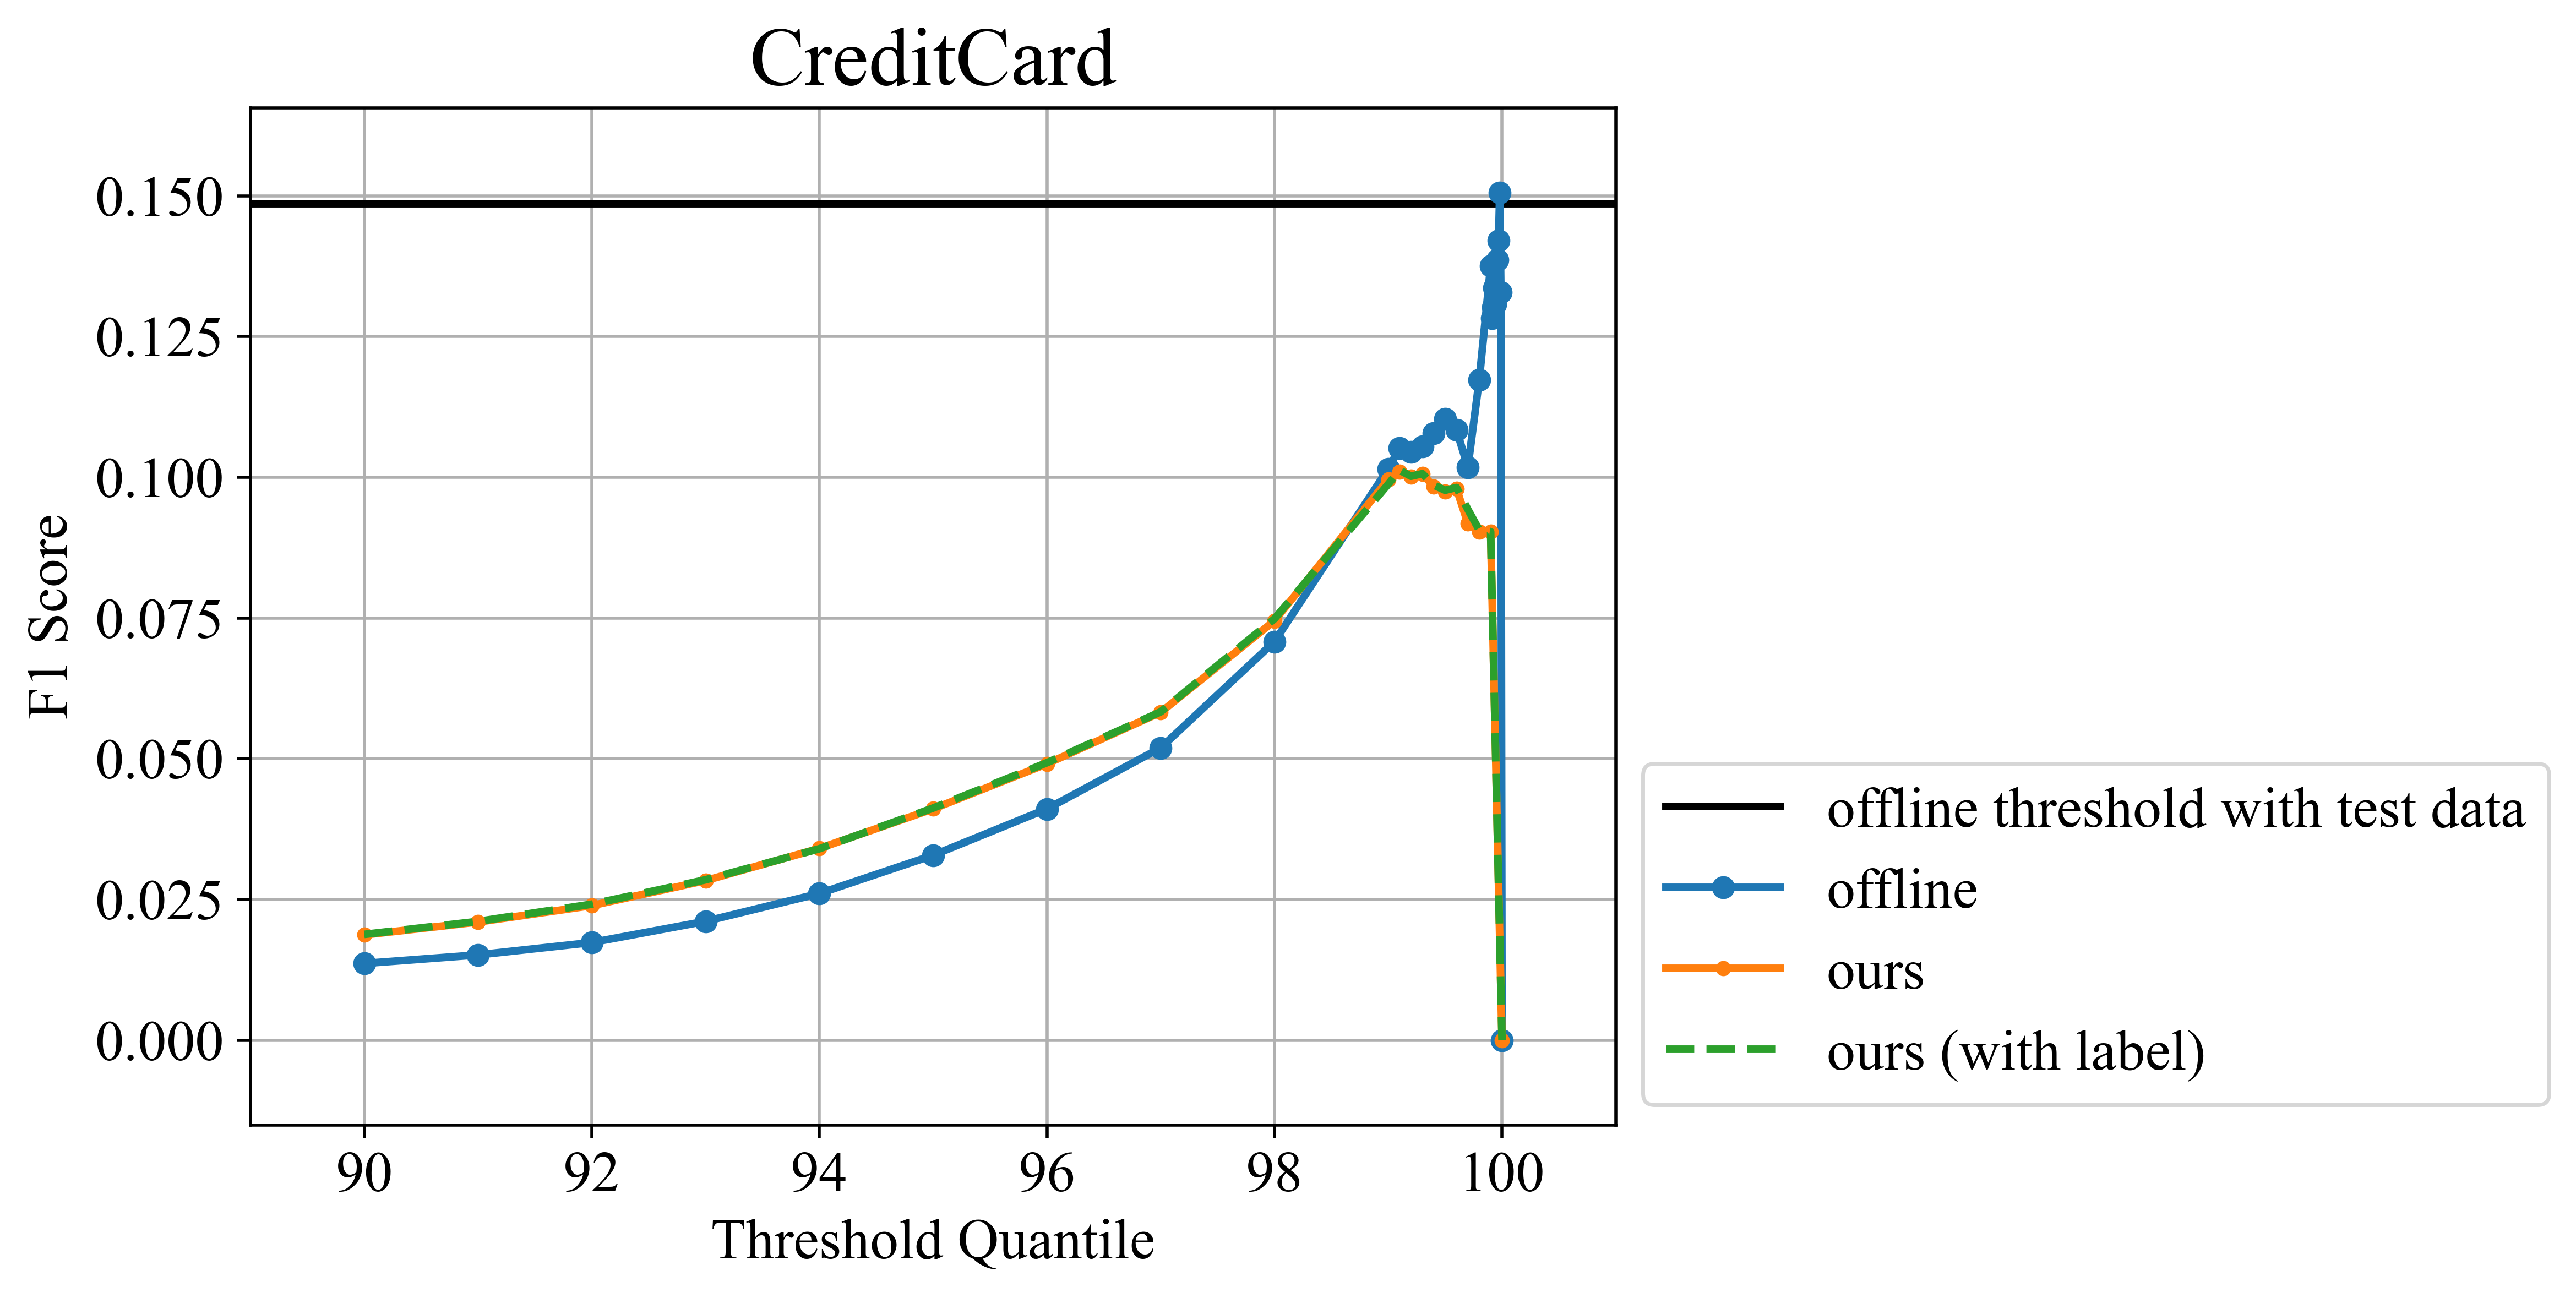

results\MLP_yahoo_20_normalization_None | offline_0
MLP_yahoo_20_normalization_None_offline_0.8_1.0_0.01.csv
MLP_yahoo_20_normalization_None_offline_0.9_1.0_0.01.csv
results\MLP_yahoo_20_normalization_None | offline_0
MLP_yahoo_20_normalization_None_offline_0.8_1.0_0.01.csv
MLP_yahoo_20_normalization_None_offline_0.9_1.0_0.01.csv
results\MLP_yahoo_20_normalization_SlowRevIN | SlowRevIN_online_0
MLP_yahoo_20_normalization_SlowRevIN_online_0.8_1.0_0.01.csv
results\MLP_yahoo_20_normalization_SlowRevIN | SlowRevIN_online_0
MLP_yahoo_20_normalization_SlowRevIN_online_0.8_1.0_0.01.csv
results\MLP_yahoo_20_normalization_SlowRevIN | SlowRevIN_online_label
MLP_yahoo_20_normalization_SlowRevIN_online_label_0.8_1.0_0.01.csv
results\MLP_yahoo_20_normalization_SlowRevIN | SlowRevIN_online_label
MLP_yahoo_20_normalization_SlowRevIN_online_label_0.8_1.0_0.01.csv


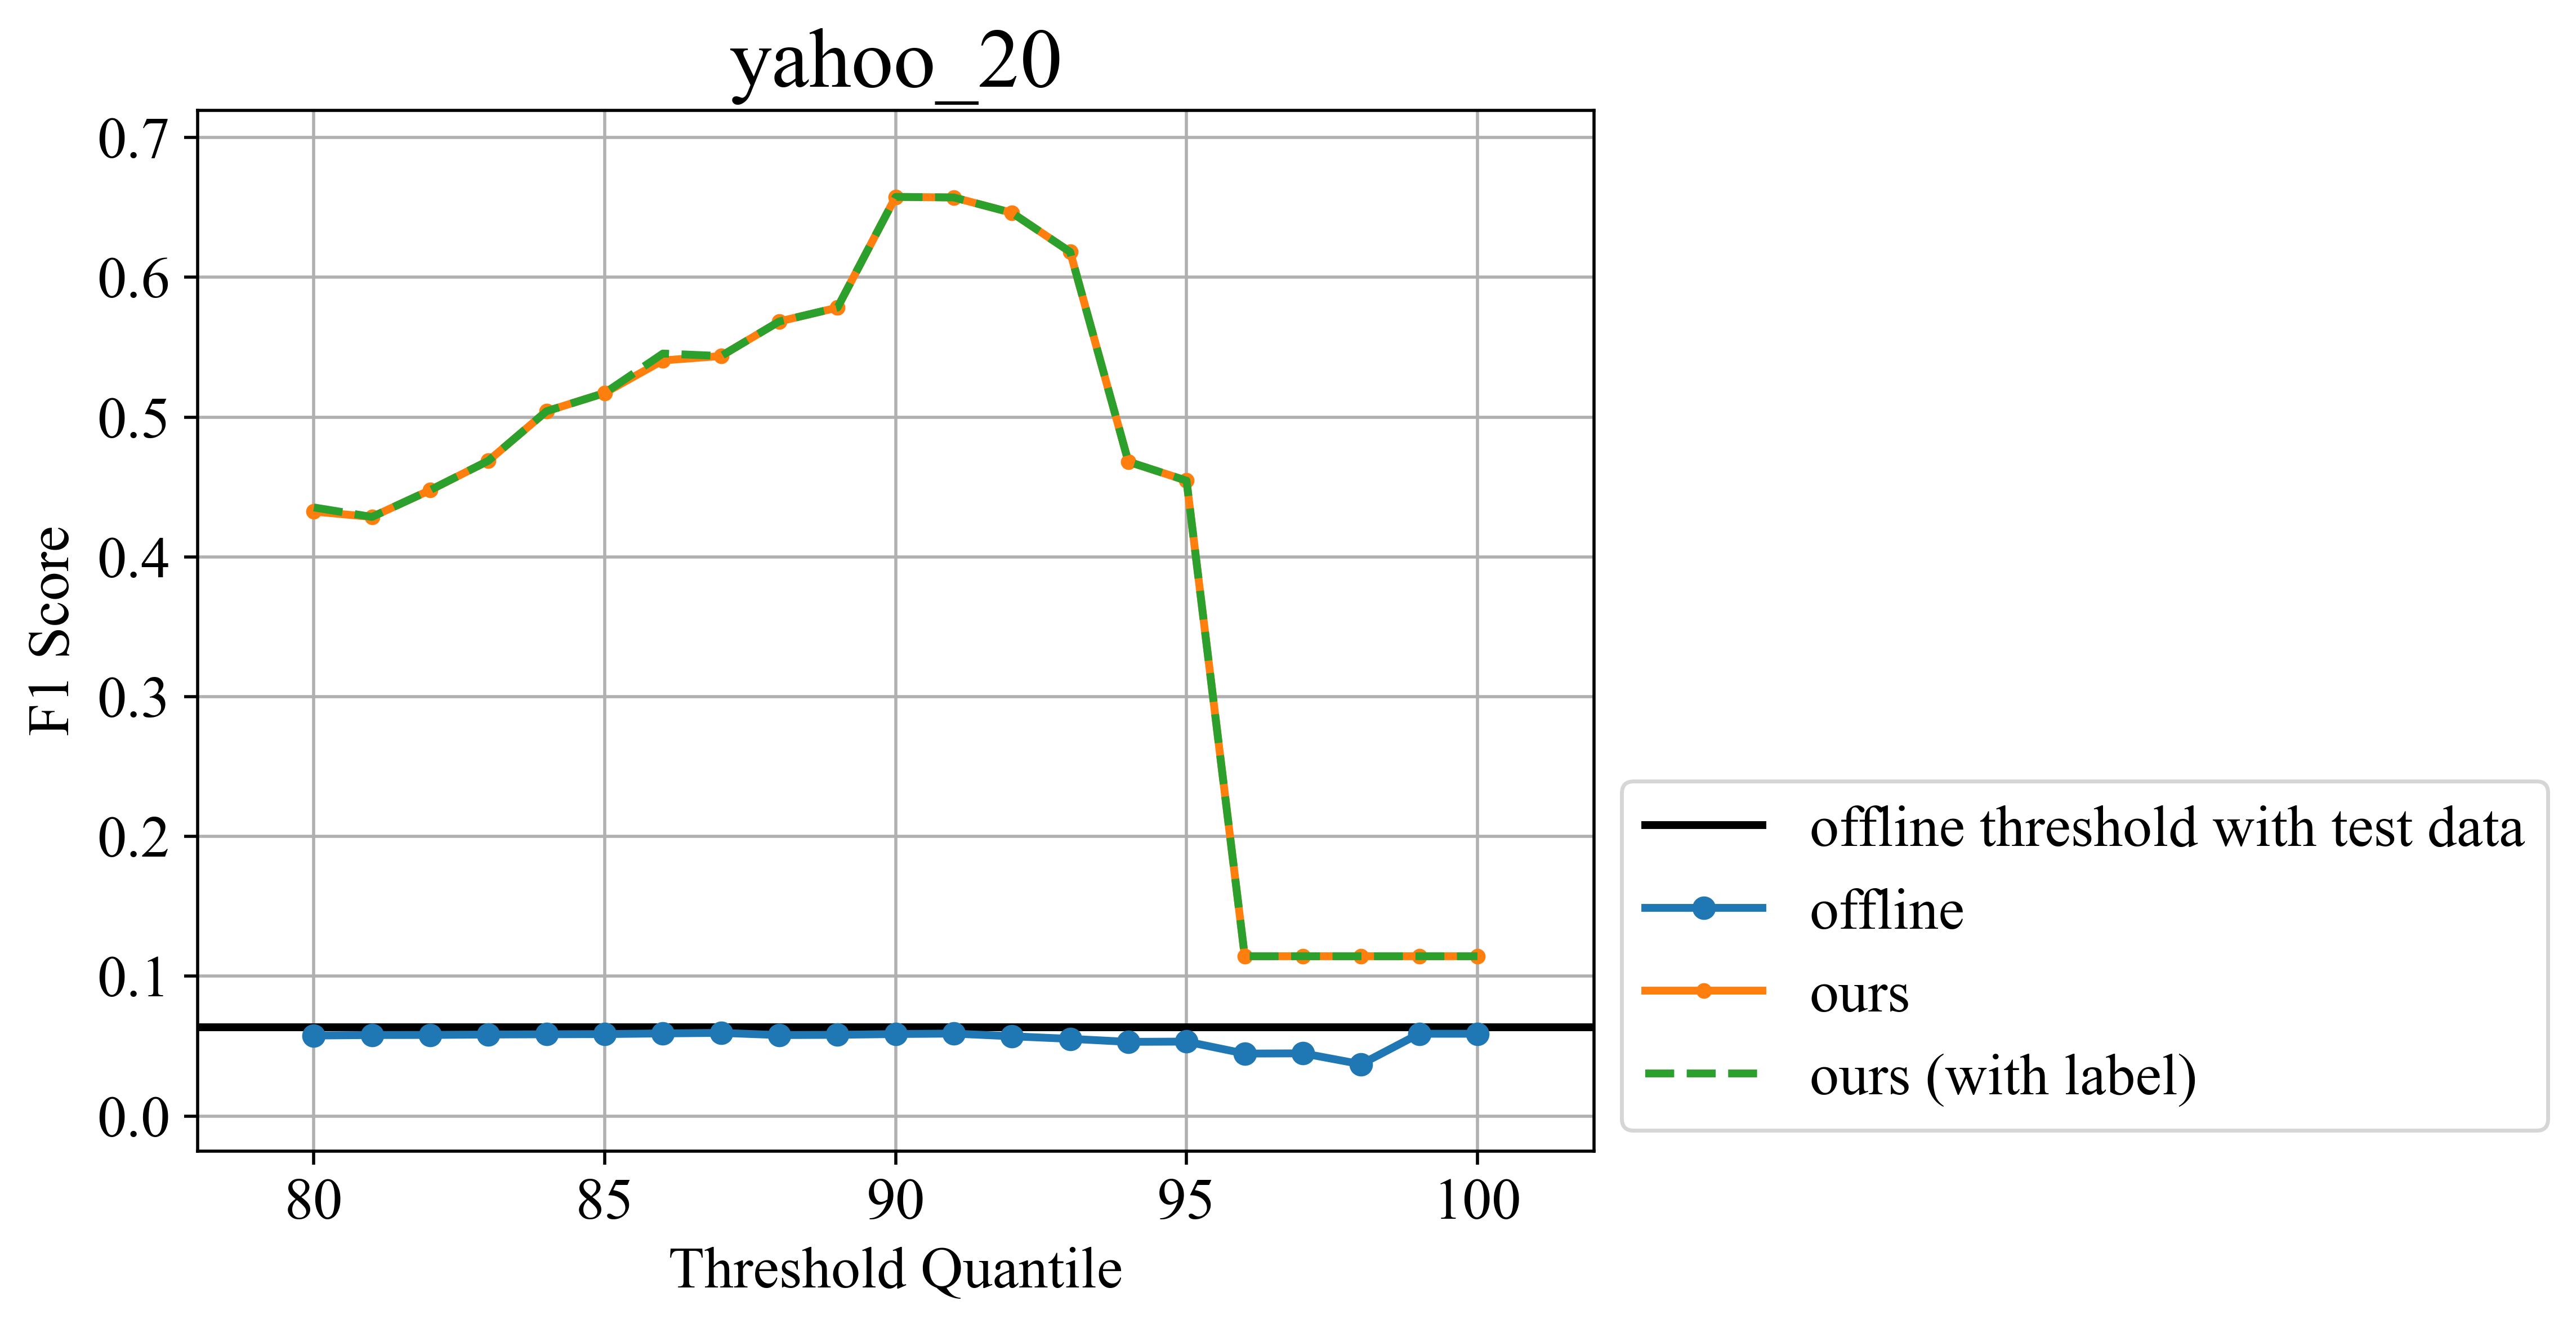

results\MLP_MSL_P-15_normalization_None | offline_0
MLP_MSL_P-15_normalization_None_offline_0.995_0.996_0.0001.csv
MLP_MSL_P-15_normalization_None_offline_0.99_1.0_0.001.csv
MLP_MSL_P-15_normalization_None_offline_0.9_1.0_0.01.csv
results\MLP_MSL_P-15_normalization_None | offline_0
MLP_MSL_P-15_normalization_None_offline_0.995_0.996_0.0001.csv
MLP_MSL_P-15_normalization_None_offline_0.99_1.0_0.001.csv
MLP_MSL_P-15_normalization_None_offline_0.9_1.0_0.01.csv
results\MLP_MSL_P-15_normalization_SlowRevIN | SlowRevIN_online_0
MLP_MSL_P-15_normalization_SlowRevIN_online_0.99_1.0_0.001.csv
MLP_MSL_P-15_normalization_SlowRevIN_online_0.9_1.0_0.01.csv
results\MLP_MSL_P-15_normalization_SlowRevIN | SlowRevIN_online_0
MLP_MSL_P-15_normalization_SlowRevIN_online_0.99_1.0_0.001.csv
MLP_MSL_P-15_normalization_SlowRevIN_online_0.9_1.0_0.01.csv
results\MLP_MSL_P-15_normalization_SlowRevIN | SlowRevIN_online_label
MLP_MSL_P-15_normalization_SlowRevIN_online_label_0.99_1.0_0.001.csv
MLP_MSL_P-15_normal

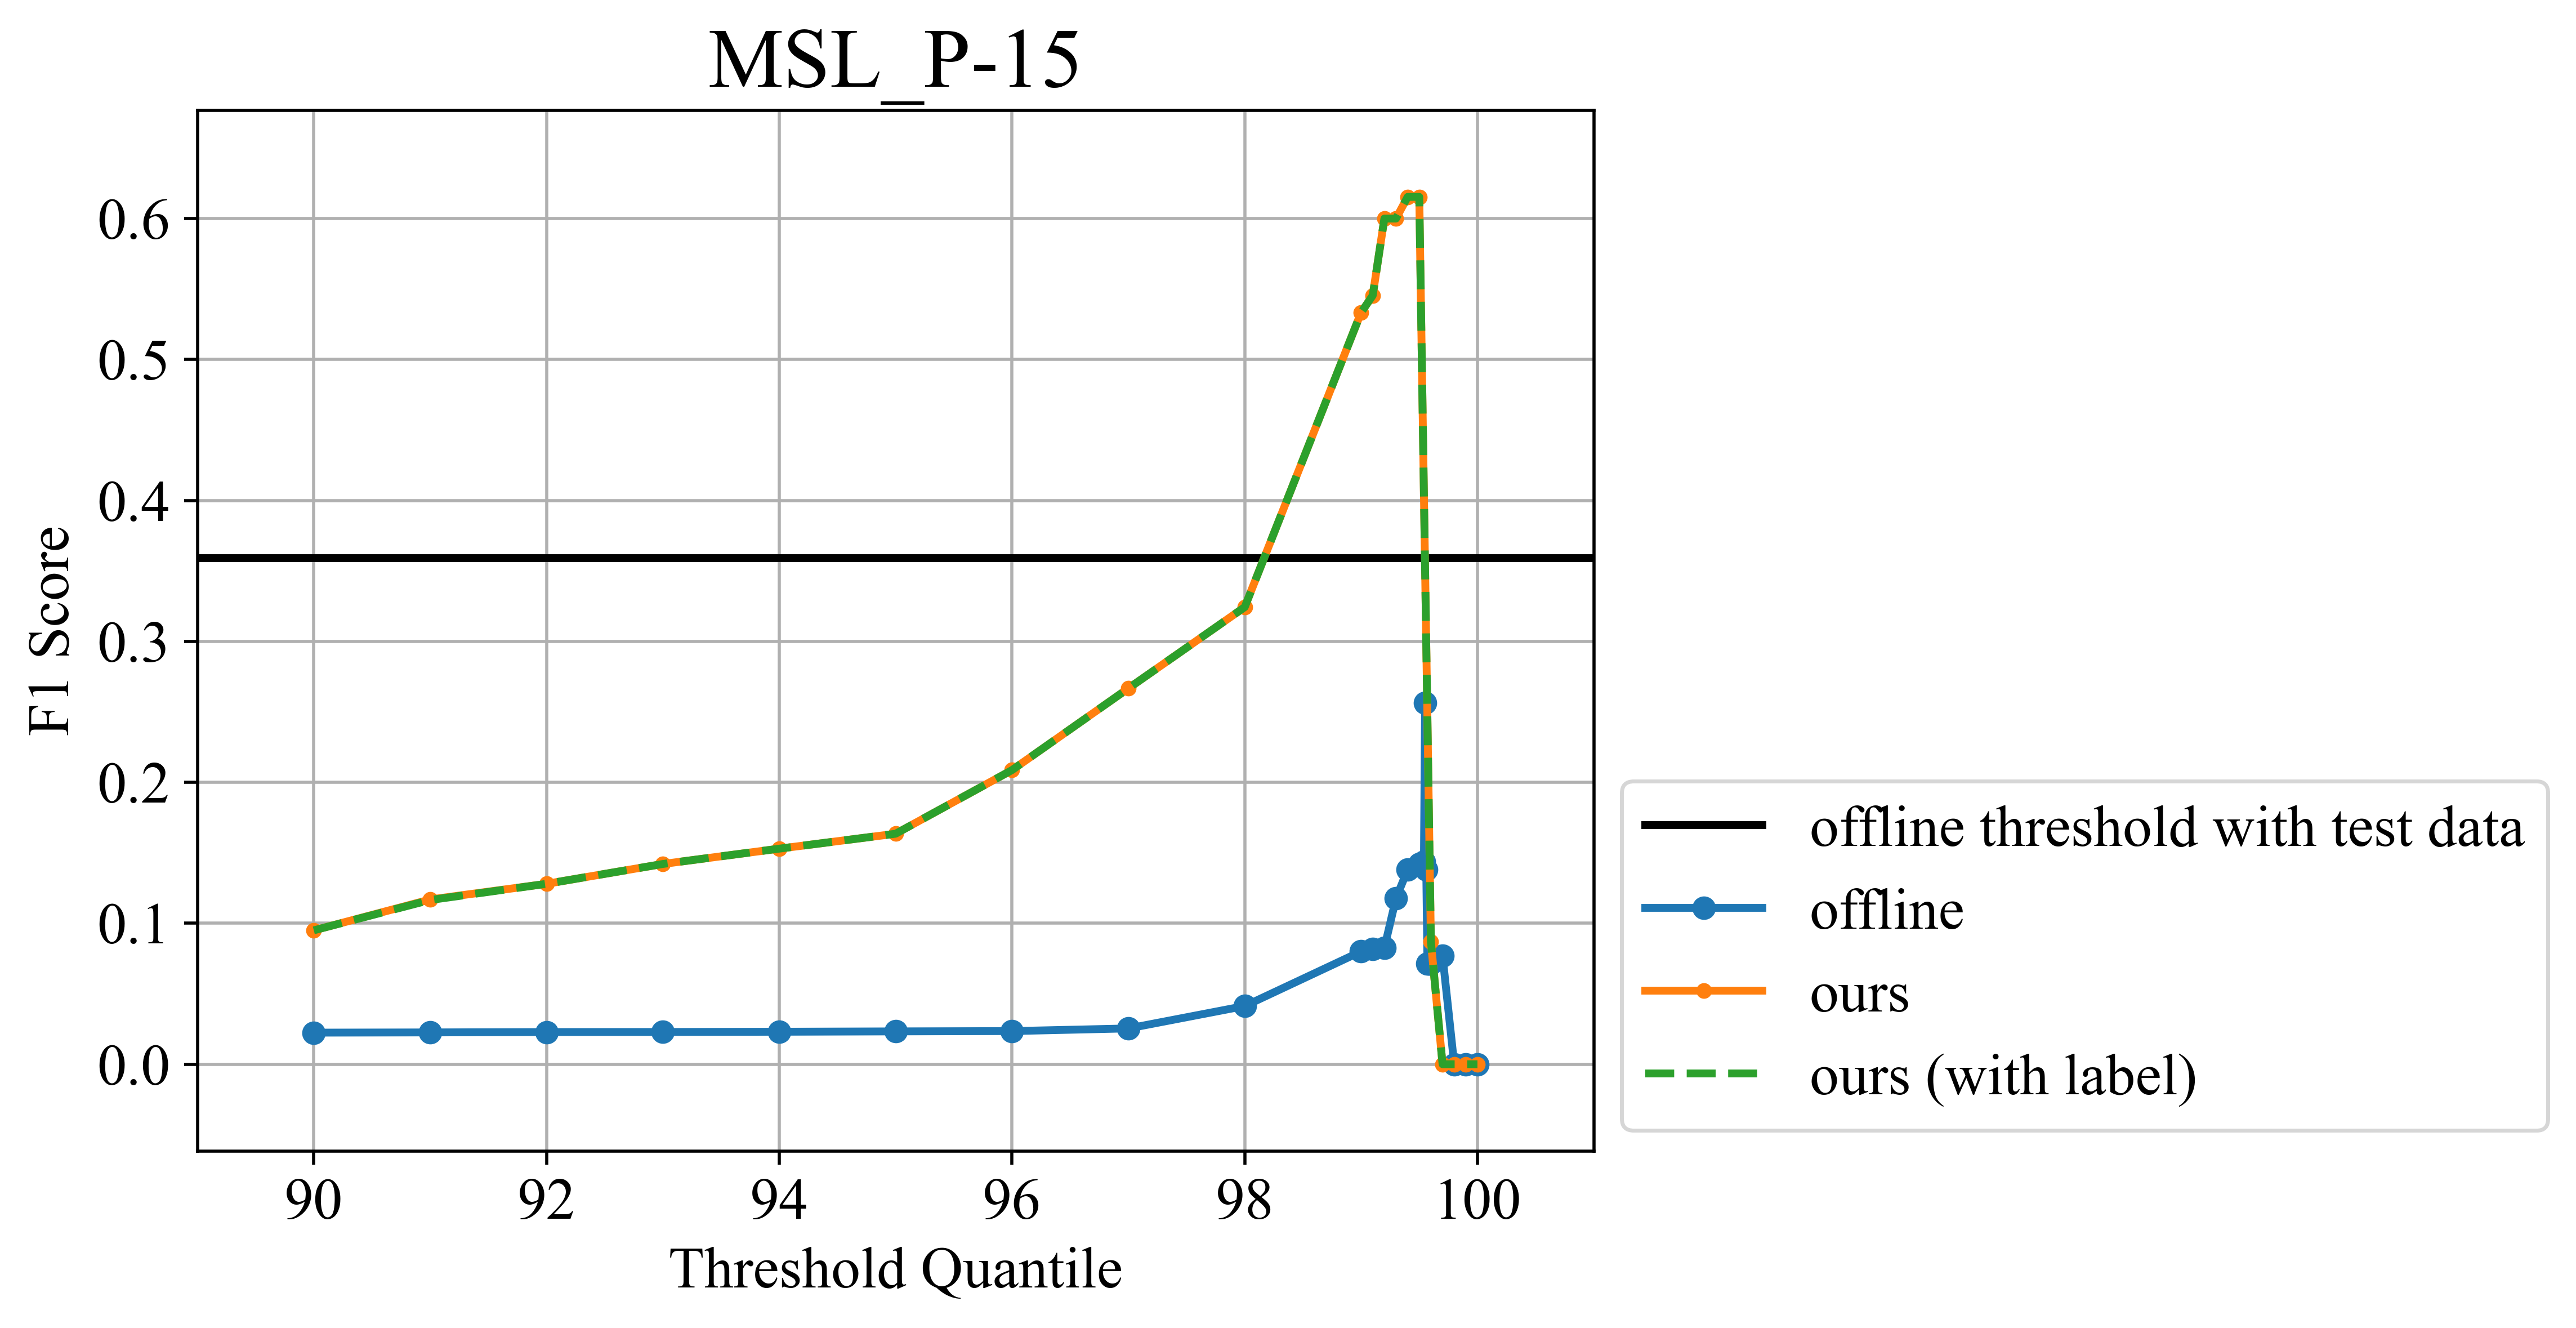

results\MLP_Pump_normalization_None | offline_0
MLP_Pump_normalization_None_offline_0.998_0.999_0.0001.csv
MLP_Pump_normalization_None_offline_0.99_1.0_0.001.csv
MLP_Pump_normalization_None_offline_0.9_1.0_0.01.csv
results\MLP_Pump_normalization_None | offline_0
MLP_Pump_normalization_None_offline_0.998_0.999_0.0001.csv
MLP_Pump_normalization_None_offline_0.99_1.0_0.001.csv
MLP_Pump_normalization_None_offline_0.9_1.0_0.01.csv
results\MLP_Pump_normalization_SlowRevIN | SlowRevIN_online_0
MLP_Pump_normalization_SlowRevIN_online_0.99_1.0_0.001.csv
MLP_Pump_normalization_SlowRevIN_online_0.9_1.0_0.01.csv
results\MLP_Pump_normalization_SlowRevIN | SlowRevIN_online_0
MLP_Pump_normalization_SlowRevIN_online_0.99_1.0_0.001.csv
MLP_Pump_normalization_SlowRevIN_online_0.9_1.0_0.01.csv
results\MLP_Pump_normalization_SlowRevIN | SlowRevIN_online_label
MLP_Pump_normalization_SlowRevIN_online_label_0.99_1.0_0.001.csv
MLP_Pump_normalization_SlowRevIN_online_label_0.9_1.0_0.01.csv
results\MLP_Pump_nor

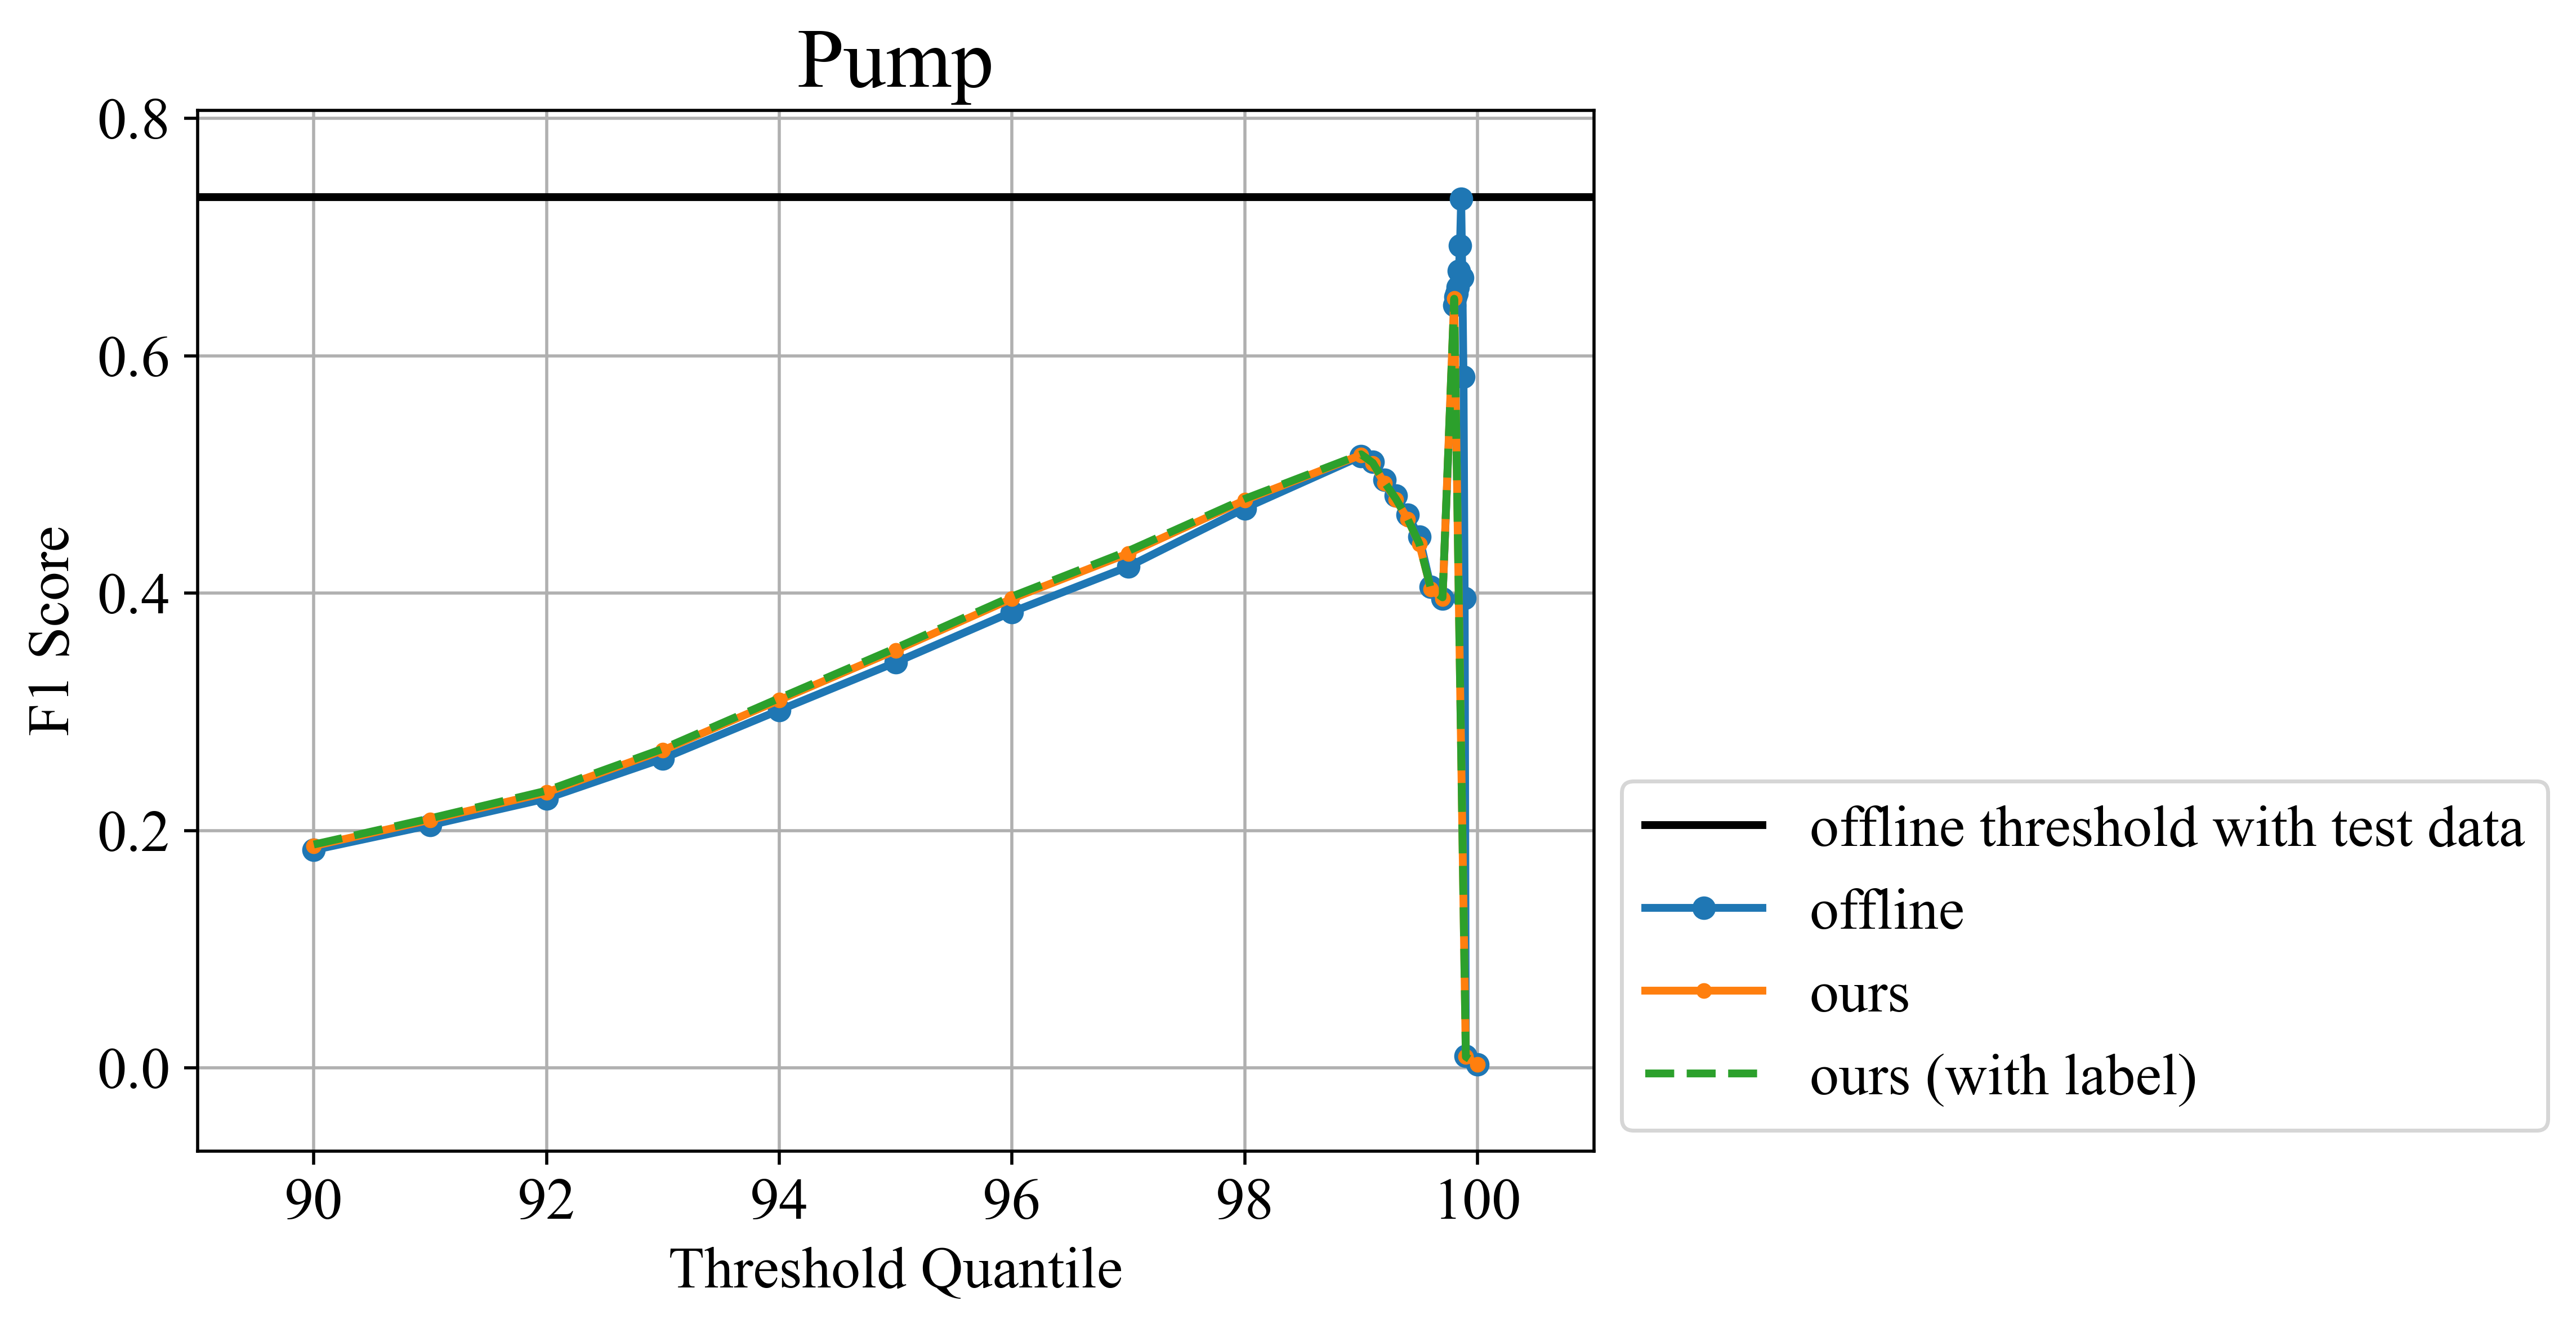

In [25]:
model = "MLP"
data = ["SWaT", "WADI", "PSM",  "CreditCard", "yahoo_20", "MSL_P-15", "Pump"]
#norm = ["None", "RevIN", "SlowRevIN"]
ms = 3
for d in data:
    plt.title(f"{d}")
    
    plt.xlabel("Threshold Quantile")
    plt.ylabel("F1 Score")
    
    # qBest
    path = os.path.join("results", f"MLP_{d}_normalization_None")
    df = pd.read_csv(os.path.join(path, os.listdir(path)[0]), index_col=0)
    qBest = df[df.index=="Qbest"]["F1"].values[0]
    plt.axhline(qBest, color="black", label="offline threshold with test data")
    
    # offline
    savedf(os.path.join("results", f"MLP_{d}_normalization_None"), "offline_0")
    q, f1 = subresult(os.path.join("results", f"MLP_{d}_normalization_None"), "offline_0")
    plt.plot(q, f1, '-o', label="offline", markersize=ms+2)
    
    # offline+SlowRevIN
    #savedf(os.path.join("results", f"MLP_{d}_normalization_SlowRevIN"), "SlowRevIN_offline_wSR")
    #q, f1 = subresult(os.path.join("results", f"MLP_{d}_normalization_SlowRevIN"), "SlowRevIN_offline_wSR")
    #plt.plot(q, f1, '-o', label="offline+normalize", markersize=ms)
    
    # online
    #savedf(os.path.join("results", f"MLP_{d}_normalization_None"), "None_online")
    #q, f1 = subresult(os.path.join("results", f"MLP_{d}_normalization_None"), "None_online")
    #plt.plot(q, f1, '-o', label="online", markersize=ms)
    
    # online+SlowRevIN
    savedf(os.path.join("results", f"MLP_{d}_normalization_SlowRevIN"), "SlowRevIN_online_0")
    q, f1 = subresult(os.path.join("results", f"MLP_{d}_normalization_SlowRevIN"), "SlowRevIN_online_0")
    #plt.plot(q, f1, '-o', label="online+normalize", markersize=ms)
    plt.plot(q, f1, '-o', label="ours", markersize=ms)

    # online+SlowRevIN+Label
    savedf(os.path.join("results", f"MLP_{d}_normalization_SlowRevIN"), "SlowRevIN_online_label")
    q, f1 = subresult(os.path.join("results", f"MLP_{d}_normalization_SlowRevIN"), "SlowRevIN_online_label")
    plt.plot(q, f1, '--', label="ours (with label)", markersize=ms)
    
    
    plt.legend(loc=(1.02, 0.02))
    plt.show()